# Shortest Path of the Union of Domains (SPUD) Demonstration

This demonstrates how to use the SPUD class. Note, not everything discussed in the paper will be shown here. 

In [1]:
from mashspud.SPUD import SPUD

#We will require pandas for this demonstration
from demonstration_helper import *
import warnings

#Ignore the graphtools warnings. NOTE: You should probably remove this if you change the code, and so you can get the warnings. 
warnings.filterwarnings("ignore")

## Iris Data set

In [2]:
#Prepare the dataset
iris_features, iris_labels = prepare_dataset("csv_files/iris.csv")

#Create domains
iris_domainA, iris_domainB = split_features(iris_features, split = "distort") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
iris_anchors = create_anchors(int(len(iris_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
iris_spud = SPUD(knn = 8, verbose = 3)

#Fit SPUD
iris_spud.fit(dataA = iris_domainA, dataB = iris_domainB, known_anchors=iris_anchors)

<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


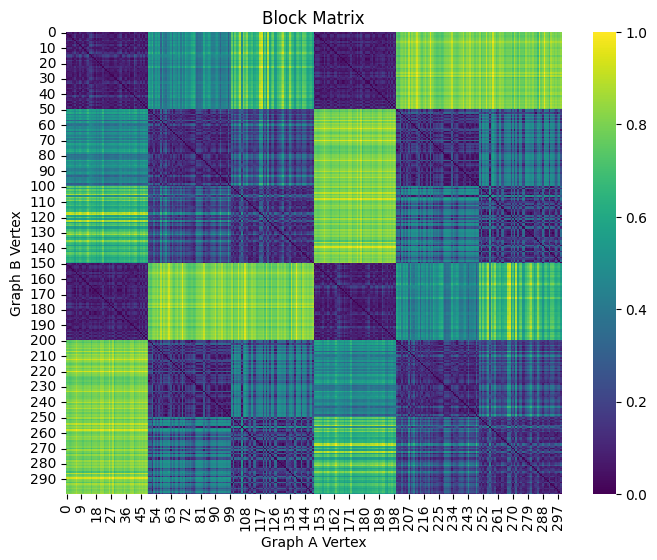

In [3]:
#Plot heat map
iris_spud.plot_heat_map() #The top left block represents domain A, and the bottom right is domain b. The off-diagonals represent interdomain distances.

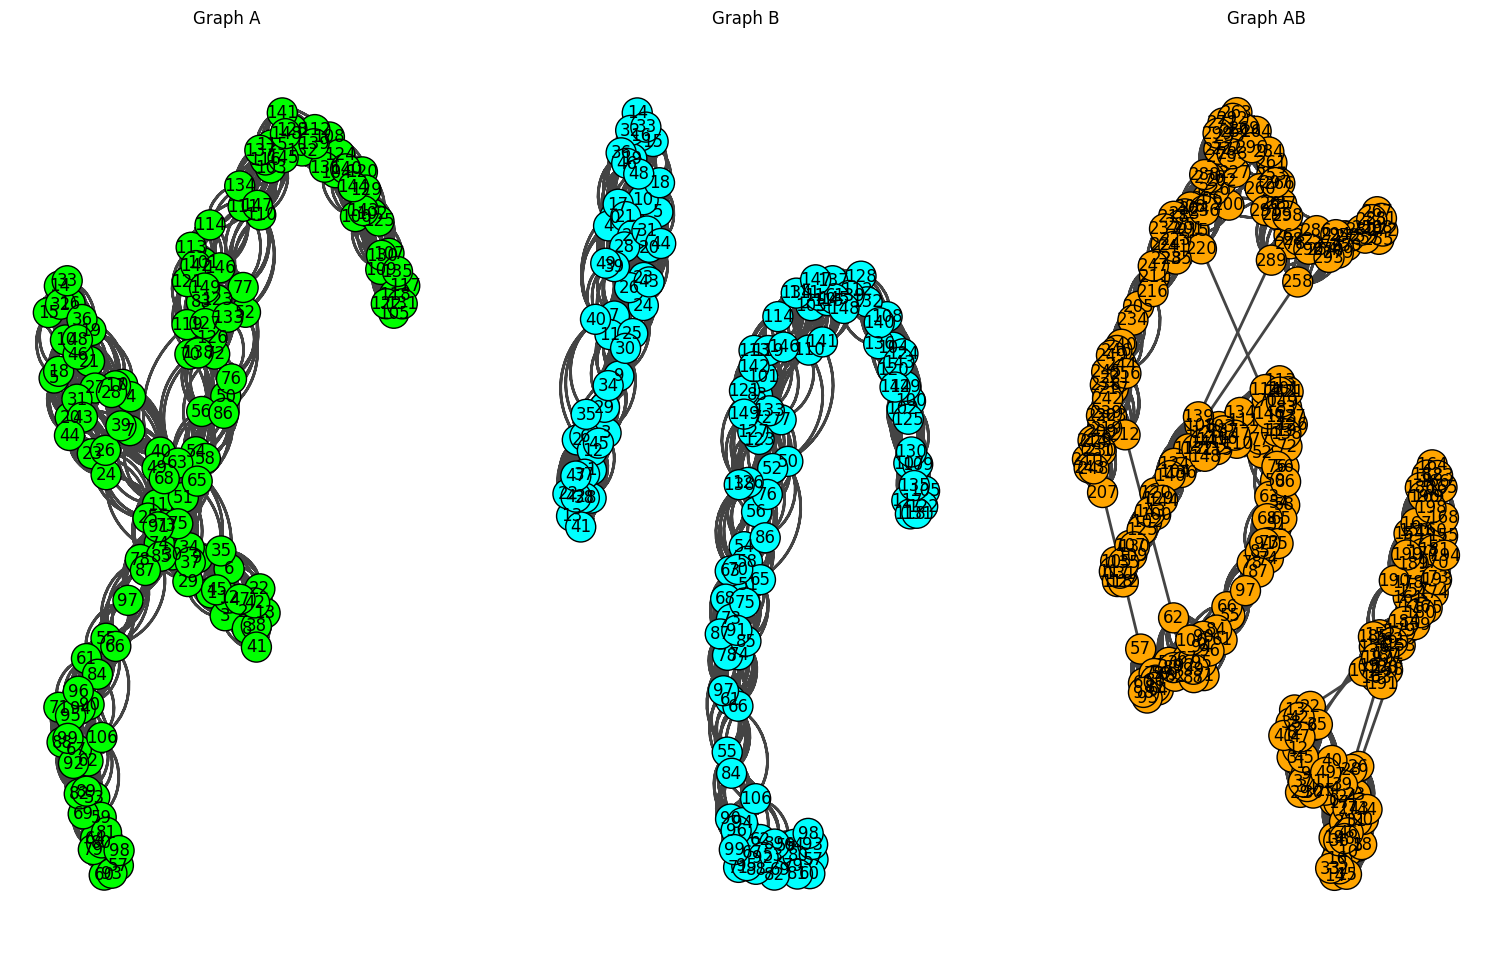

In [4]:
#Plot Graphs
iris_spud.plot_graphs() #This function takes the most time, so in the future, we will not plot it. 

RF-GAP score is accuracy
Calculating the classification Score.
RF score on full embedding: 0.9766666666666667
Cross Embedding score: 0.96
Fraction of Samples Closest to thier Match: 0.0006222222222222223


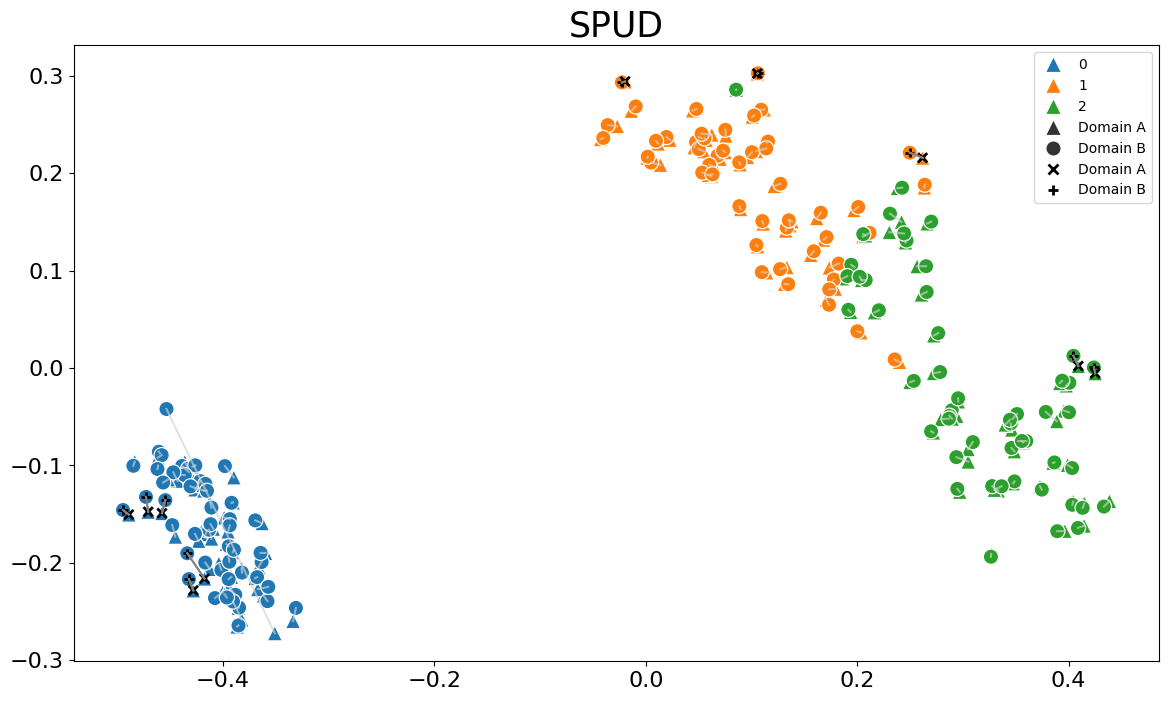

In [5]:
#Plot Embedding
iris_spud.plot_emb(labels = iris_labels) #Try playing with the hyperparameters to change how the plot shows. 

How to interpret the above graph:
- The triangles are instances that come from Domain A, whereas the circles are instances that come from Domain B. 
- The light gray lines connect instances between domains that are the same (though distorted some how). The samller the line, the better i.e. leads to a lower (and better) FOSCTTM score.
- The black x or + means that the instance is an anchor, and thus was known knowledge for the algorithm to use. 
- The colors are different classes. We hope for their to be a natural class split. The better the split, the higher the CE score. 

## Seeds Dataset

In [6]:
#Prepare the dataset
seeds_features, seeds_labels = prepare_dataset("csv_files/seeds.csv")

#Create domains
seeds_domainA, seeds_domainB = split_features(seeds_features, split = "rotation") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
seeds_anchors = create_anchors(int(len(seeds_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
seeds_spud = SPUD(knn = 8, verbose = 3)

#Fit SPUD
seeds_spud.fit(dataA = seeds_domainA, dataB = seeds_domainB, known_anchors=seeds_anchors)

<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


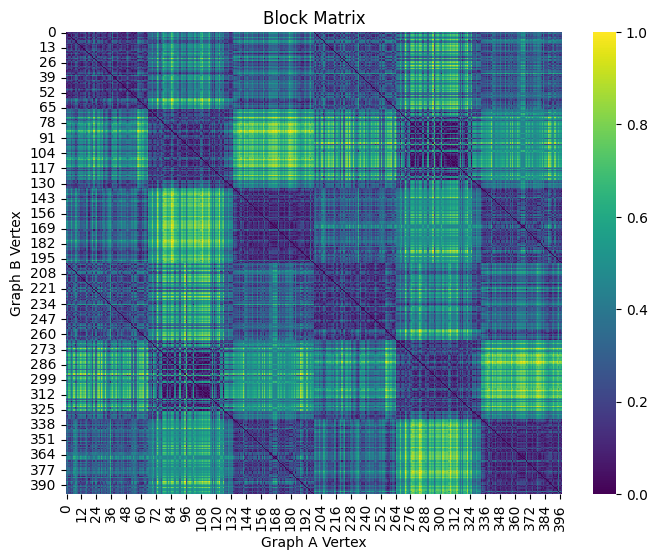

In [7]:
seeds_spud.plot_heat_map()

RF-GAP score is accuracy
Calculating the classification Score.
RF score on full embedding: 0.9748743718592965
Cross Embedding score: 0.9120603015075377
Fraction of Samples Closest to thier Match: 0.000151511325471579


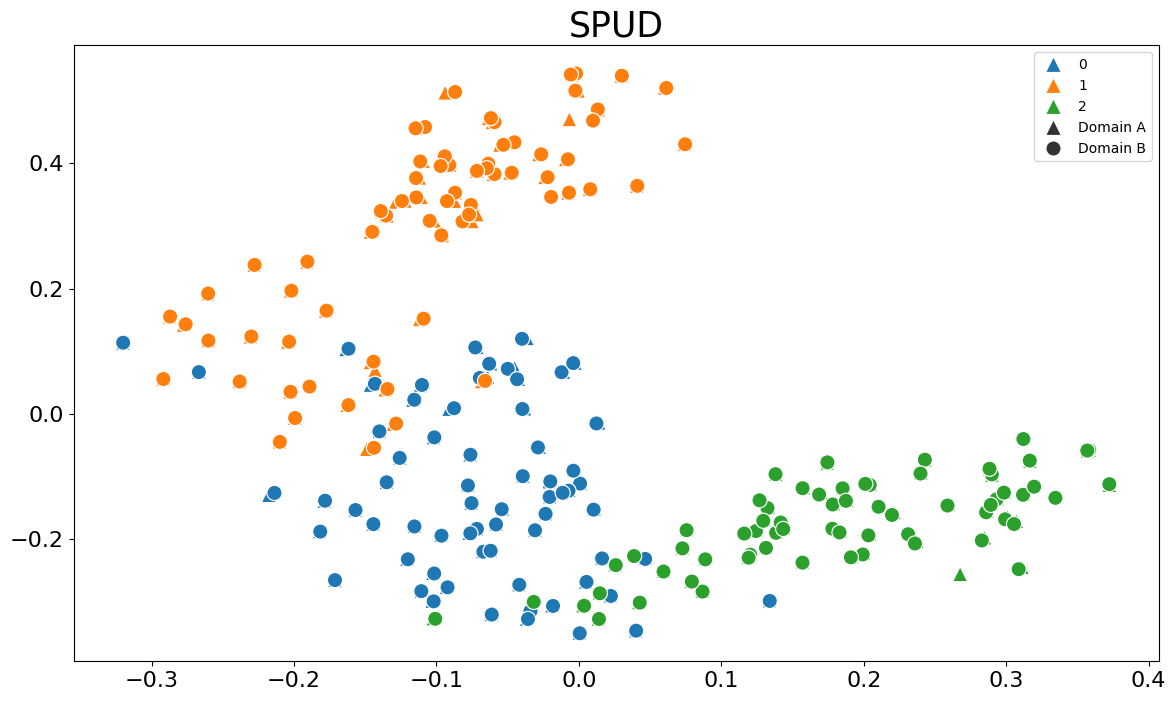

In [8]:
seeds_spud.plot_emb(labels = seeds_labels, show_lines = False, show_anchors = False)

## Breast Cancer Dataset

In [9]:
#Prepare the dataset
cancer_features, cancer_labels = prepare_dataset("csv_files/breast_cancer.csv")

#Create domains
cancer_domainA, cancer_domainB = split_features(cancer_features, split = "random") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
cancer_anchors = create_anchors(int(len(cancer_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
cancer_spud = SPUD(knn = 12, agg_method="log", verbose = 4)

#Fit SPUD
cancer_spud.fit(dataA = cancer_domainA, dataB = cancer_domainB, known_anchors=cancer_anchors)

Time it took to compute SGDM:  0.03
Time it took to execute graphtools.Graph functions:  0.34
Time it took to execute merge_graphs function:  0.01
Time it took to execute get_block function:  0.5
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


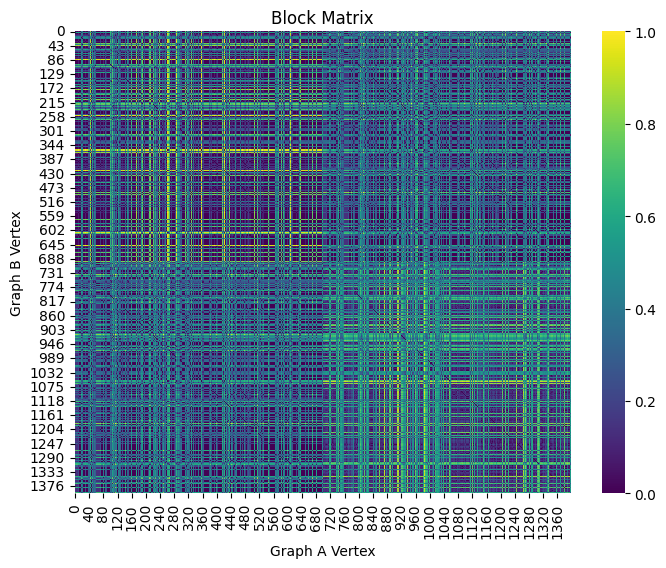

In [10]:
cancer_spud.plot_heat_map()

Time it took to calculate the embedding: 35.88
RF-GAP score is accuracy
Calculating the classification Score.
RF score on full embedding: 0.9513590844062947
Cross Embedding score: 0.9427753934191703
Fraction of Samples Closest to thier Match: 0.09531908448816111


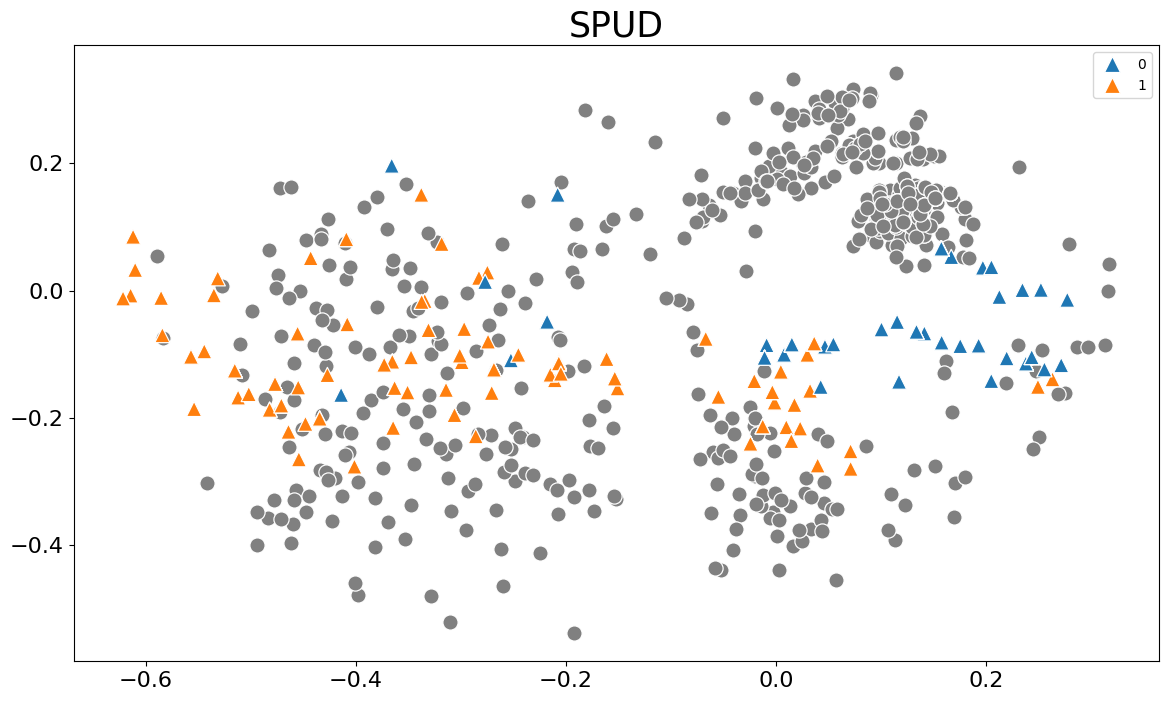

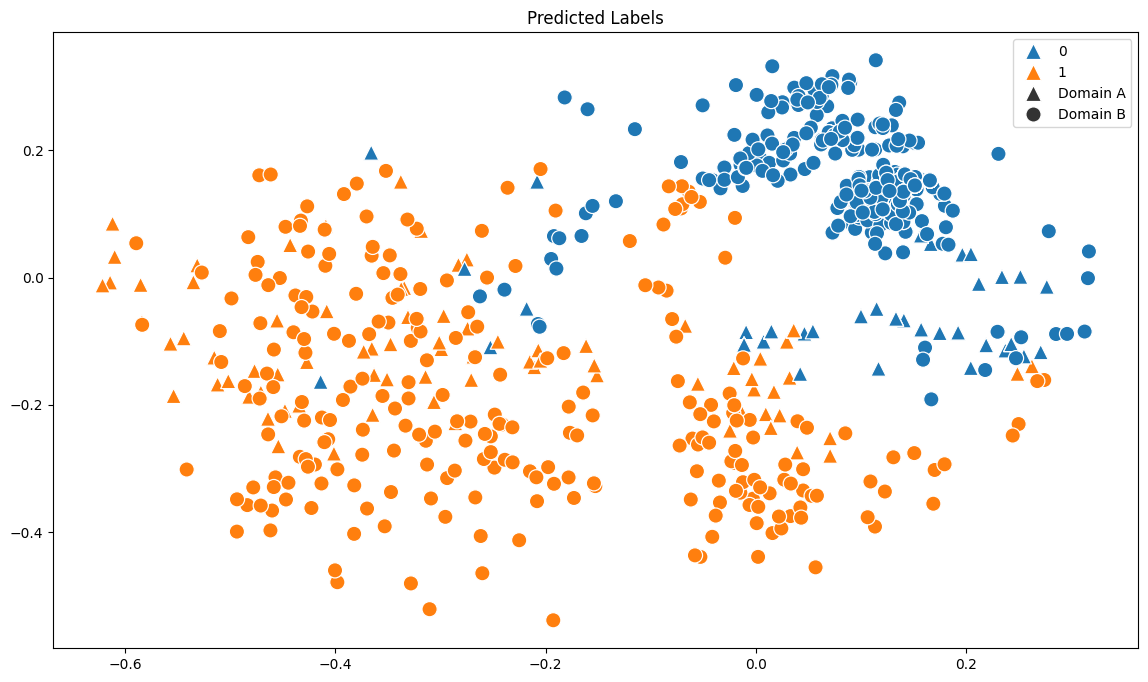

Time it took complete the plots: 0.67


In [11]:
cancer_spud.plot_emb(labels = cancer_labels, show_anchors=False, show_pred=True, show_lines=False) #You can change show_pred to false to see the actual labels the second domain.

## Glass Dataset using RF_GAP Proximities
- Paper can be veiwed here: https://arxiv.org/abs/2411.15179v1

In [6]:
#Prepare the dataset
glass_features, glass_labels = prepare_dataset("csv_files/glass.csv")

#Create domains
glass_domainA, glass_domainB = split_features(glass_features, split = "distort") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
glass_anchors = create_anchors(int(len(glass_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

#Import the RF_GAP proximities measure
from mashspud.RF_GAP import use_rf_similarities

# Initialize SPUD
"""
NOTE: As described in the paper, to use the RF_GAP similarities requires labels. Thus, we needed to make a custom function to be able to take in the label information as well. Because of how SPUD and
MASH are set up, use_rf_similarities has a few lines that reset class varaibles to what they should be. When making custom distance functions, its important to keep this in mind. 
"""
glass_spud = SPUD(knn = 5, distance_measure_A=use_rf_similarities, distance_measure_B=use_rf_similarities,  verbose = 4)

#Fit SPUD
glass_spud.fit(dataA = (glass_domainA, glass_labels[:214]), dataB = (glass_domainB, glass_labels[214:]), known_anchors=glass_anchors) #Using the labels

Time it took to compute SGDM:  0.82
Time it took to execute graphtools.Graph functions:  0.16
Time it took to execute merge_graphs function:  0.0
Time it took to execute get_block function:  0.04
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


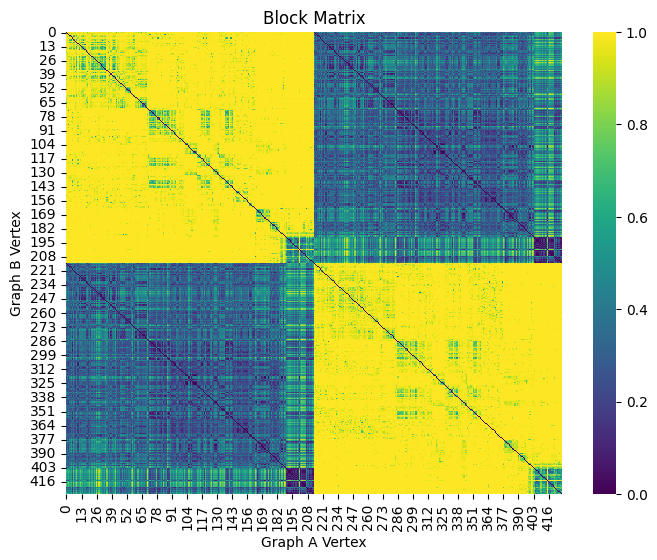

In [7]:
glass_spud.plot_heat_map()

Time it took to calculate the embedding: 2.21
RF-GAP score is accuracy
Calculating the classification Score.
RF score on full embedding: 0.8364485981308412
Cross Embedding score: 0.7453271028037383
Fraction of Samples Closest to thier Match: 0.00010917984103415145


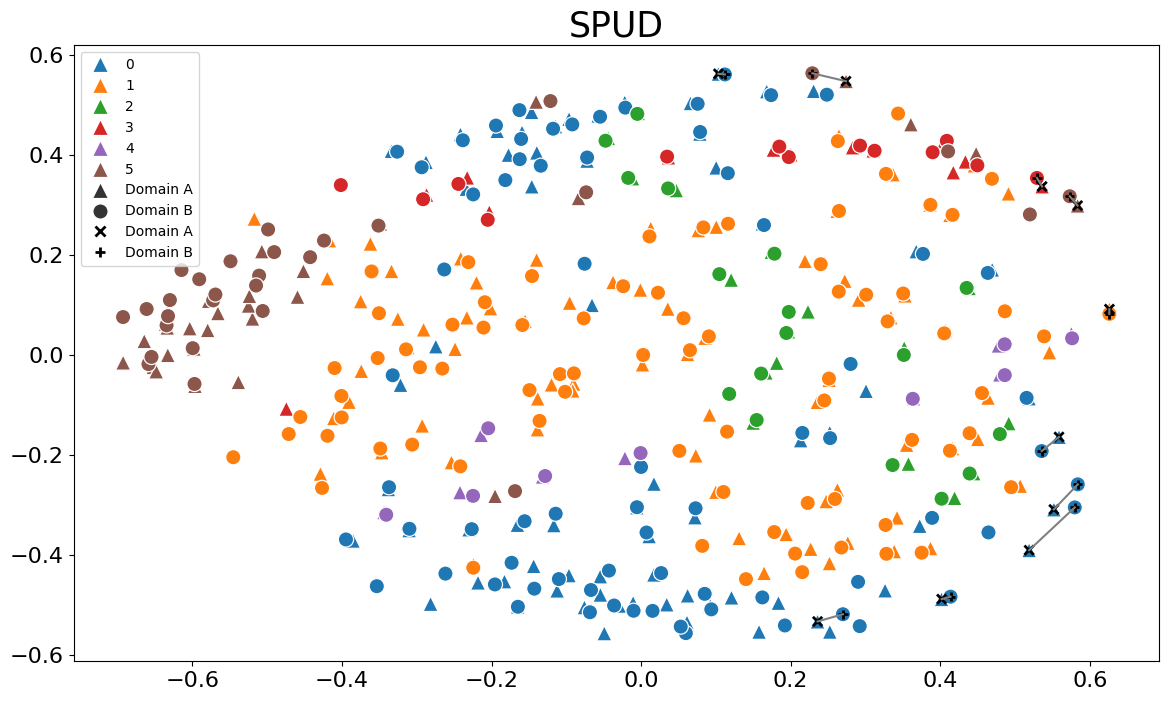

Time it took complete the plots: 0.44


In [8]:
glass_spud.plot_emb(glass_labels, show_lines=False)